In [12]:
import cv2
import tensorflow as tf

In [13]:
gpu = tf.test.is_gpu_available()
print(gpu)

False


In [11]:
print(cv2.__version__)
count = cv2.cuda.getCudaEnabledDeviceCount()
print(count)

4.5.4
0


In [7]:
import numpy as np
# 引入 time 模組
import time
print(cv2.__version__)
# 開始測量時間
start = time.time()

#讀取權重及神經網路結構建立神經網路
net = cv2.dnn.readNet('./yolov4_training_last.weights','./yolov4_training.cfg')
# net = cv2.dnn.readNet('yolov4_training_last.weights')
#類別名稱
classes = []
#讀取類別名稱txt
with open('./classes.txt','r')as f:
    classes = f.read().splitlines()
print(classes)
color1 = (255, 255, 0)#配置預測框顏色
#無限迴圈
while True:
    #讀取要辨識的圖片
    img=cv2.imread('../picture/face/six_frame952.jpg')
    #讀取畫面長、寬、通道
    height, width, channel =img.shape
    #將影像預處理，參數依序為：影像、正規化、縮放尺寸、RB通道交換
    blob = cv2.dnn.blobFromImage(img, 1/255, (608,608), swapRB=True)
    #將影像輸入神經網路
    net.setInput(blob)
    #列出YOLO神經網路輸出層的名稱，YOLOv4有3個輸出層
    output_layers_names = net.getUnconnectedOutLayersNames()
    #將這幾層的輸出結果儲存，為多個5+classes維的數組
    #5+classes維是由預測框的中心點參數x,y、預測框的長寬參數w,h、
    #存在物件的信心度和所屬各類別的信心度所組成
    layerOutputs = net.forward(output_layers_names)
    
    boxes = [] #暫存預測框的參數用
    confidences = [] #暫存存在物件信心度用
    class_ids = [] #暫存分類編號用
    #篩選預測框及分類閥值，輸出層有三個，外迴圈跑三次
    #內迴圈次數依據預測框的數量
    for output in layerOutputs:
        for detection in output:
            #找尋信心度最高的分類
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            #篩選閥值及儲存框參數
            if confidence > 0.6:
                #預測框參數的範圍皆為0~1
                #需做比例尺轉換
                center_x = int(detection[0]*width)
                center_y = int(detection[1]*height)
                w = int(detection[2]*width)
                h = int(detection[3]*height)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                #暫存預測框參數
                boxes.append([x,y,w,h])
                #暫存信心度
                confidences.append((float(confidence)))
                #暫存分類編號
                class_ids.append(class_id)
    #第二次篩選預測框，參數依序為：預測框參數、存在物件信心度、
    #信心度閥值及IoU閥值，
    indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.6,0.5)
        
    #畫面標示文字的字體設定，此為小號無襯線字體
    font = cv2.FONT_HERSHEY_PLAIN
    #暫存預測框顏色用
    colors = []
    #賦予每個預測框顏色
    for i in range(len(boxes)):
       colors=np.append(colors,[0,0,255])
    colors=np.reshape(colors, (len(boxes),3))
    
    #將預測框放在影像上
    if len(indexes)>0:
        for i in indexes.flatten():
            x,y,w,h = boxes[i]
            #將分類編號對應類別名稱
            label = str(classes[class_ids[i]])
            print(label)
            #取信心度小數點後兩位
            confidence = str(round(confidences[i],2))
            #預測框顏色
            if label == 'person_with_mask':
                color=(0,255,0) #Green 
            else:
                color=(0,0,255)
            #放置預測框    
            cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
            #若要在預測框上顯示類別名稱與信心度可取消下方註解
            # cv2.putText(img, label + " " + confidence ,(x,y+20),font,2,(255,255,255),2)
    
    #左上角顯示預測框數量，參數依序為：影像、位置、字體、縮放比、顏色、粗細
    cv2.putText(img, "Numember of people : "+str(len(indexes)),(50,50),font,2,(255,50,0),2)
    #儲存完成辨識後的圖片
    cv2.imwrite('test.jpg',img)
    break
# 結束測量
end = time.time()

# 輸出結果

print("執行時間：%f 秒" % (end - start))

4.5.4
['person_no_mask', 'person_with_mask']
person_with_mask
person_with_mask
person_with_mask
person_with_mask
person_no_mask
person_no_mask
執行時間：1.936436 秒


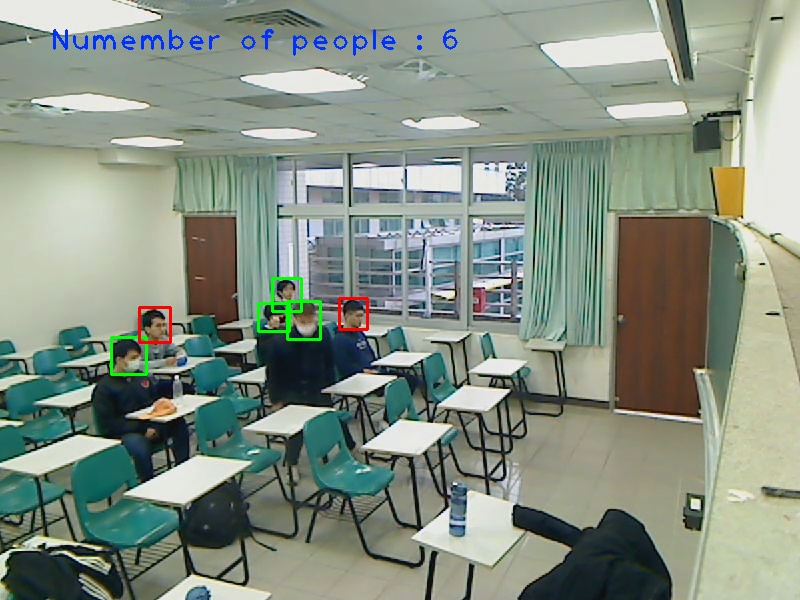

In [8]:
from PIL import Image
Image.open('./test.jpg')